<h1>Multi-Threading and multi-processing in Python</h1>
<p>
    The infamous Python Global Interpreter Lock (GIL) means that you can only write synchronous (i.e. serial) programs — that operate one after the other. But you might often want to split your serial process and run a set of tasks in parallel. This tutorial will go over two types of common scenarios to set up parallel programming in Python:
</p>
<ul>
    <li>
        <b>parallel computing</b> — parallelizing a set of identical or similar tasks--usually to speed up the efficiency of your script;
    </li>
    <li>
        <b>asynchchonous programming</b> — you might want to create a master scripts that turns on slaves and creates a simple way to properly shut them off as needed--instead of using keyboard interrupt--a kind of asynchronous processing similar to event listeners in <i>JavaScript</i>.
    </li>
</ul>

<hr>

<h4>Master/slave approach</h4>
The first method is to create a slave thread that does something, receiving objects from a master. Once objects end (i.e. a kill command is recevied), the slave ends automatically. 

Basically, a slave thread is initiated, and it runs forever as it operates through a while True loop. Once a 'quit' command is recevied however, it exists the loop and ends on its own accord. In essense, this example is superfulous -- all it does is moves execution to a slave thread, while the master waits as the GIL does not allow it do anything else at the same time.

It basically works like this:
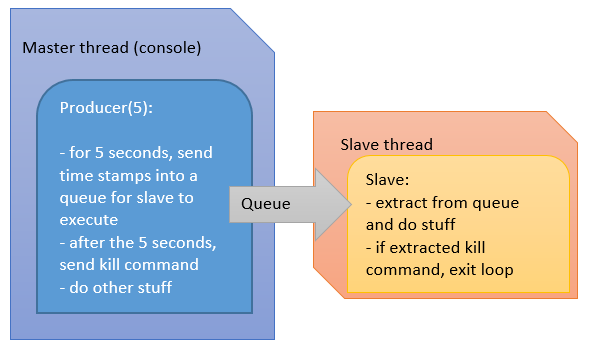

In [13]:
import threading, time, datetime
import queue

class Slave_thread(threading.Thread):
    '''
    thread object, initiates a queue it expecs and the main run command
    '''
    def __init__(self, q):
        threading.Thread.__init__(self)
        self._q = q
    
    def run(self):
        while True:
            #runs forever unless a 'quit' command is received'
            msg = self._q.get() 
            if isinstance(msg, str) and msg == 'quit':
                break
            print("I'm the slave thread, received something at {}!!".format(msg))
        print('Bye byes!')

def Producer(num_seconds_to_run_slave):
    '''
    Producer module controls the slave as part of its work
    '''
    q = queue.Queue()
    worker = Slave_thread(q)
    worker.start() 
    
    start_time = time.time() 
    while time.time() - start_time < num_seconds_to_run_slave:
        #runs for 5 seconds, and inputs into the queue a string with the timestamp
        q.put('%s' % datetime.datetime.fromtimestamp(time.time()).strftime('%X'))
        time.sleep(1)
    
    q.put('quit')
    worker.join()
    
if __name__ == '__main__':
    Producer(5)


I'm the slave thread, received something at 12:35:45!!
I'm the slave thread, received something at 12:35:46!!
I'm the slave thread, received something at 12:35:47!!
I'm the slave thread, received something at 12:35:48!!
I'm the slave thread, received something at 12:35:49!!
Bye byes!


<h2>
    Asychronous programming
</h2>
Using multiprocessing, we can create multiple processes that depend on each other

In [48]:
import os

from multiprocessing import Process, current_process

def Slave(number):
    '''
    Slave process -- all it does is run and print the time
    '''
    proc_name = current_process().name
    while True:
        print("Slave processes {}, calculation done on... current time: {}".format(
            proc_name,
            datetime.datetime.now().time()
            ))
        time.sleep(1)

if __name__ == "__main__":    
    print('Entered main...')
    nums = [1,2,3,4]
    
    for index, number in enumerate(nums):
        proc = Process(target=Slave, args=(number,)).start()
        procs.append(proc)
    


Entered main...
